# Visualization of High Dimensional Datasets using t-Distributed Stochastic Neighbor Embedding

In this notebook we aim to use the technique known as t-Distributed Stochastic Neighbor Embedding (t-SNE) in order to visualize high dimensional data. This technique created by Geoffrey Hinton and Laurens van der Maaten is a nonlinear dimensionality reduction method which focuses on mapping high dimensional data into two dimensions, which can then be seen through scatterplots. As opposed to PCA, whose objective function determines the linear combination which maximizes overall variance of the dataset, t-SNE focuses to preserve the local distances of the high-dimensional data in some mapping to low-dimensional data. We will be analyzing three datasets:  
    
1. A highly imbalanced credit card fraud detection dataset
2. A benign vs. malignant tumors classification dataset
3. A World Happiness dataset which provides metrics based on a countries happiness
       
As we are dealing with an unsupervised learning algorithms, , we will be using t-SNE to see if there are any discernable patterns for all three of these datasets.

In [10]:
library(ggplot2)
library(Rtsne)
library(data.table)
library(dplyr)
library(RColorBrewer)
library(ggrepel)
library(repr)

## Credit Card Fraud Detection

In this first dataset, we are presented with a highly imbalanced dataset of credit card fraud detections with only 492 out of 284807 transactions flagged as fraudulent. Due to the confidentiality reasons, the dataset only shows a few labeled variables (Time, Amount, and Class) with the rest being principle components of the original dataset. We will perform t-SNE on all the numeric variables minus time and see if there is any concentrations of fraudulent transactions from the resulting coordinates.


In [76]:
data <- fread("creditcard.csv")

Read 284807 rows and 31 (of 31) columns from 0.140 GB file in 00:00:07


In [62]:
summary(data)

      Time              V1                  V2                  V3          
 Min.   :     0   Min.   :-56.40751   Min.   :-72.71573   Min.   :-48.3256  
 1st Qu.: 54202   1st Qu.: -0.92037   1st Qu.: -0.59855   1st Qu.: -0.8904  
 Median : 84692   Median :  0.01811   Median :  0.06549   Median :  0.1799  
 Mean   : 94814   Mean   :  0.00000   Mean   :  0.00000   Mean   :  0.0000  
 3rd Qu.:139321   3rd Qu.:  1.31564   3rd Qu.:  0.80372   3rd Qu.:  1.0272  
 Max.   :172792   Max.   :  2.45493   Max.   : 22.05773   Max.   :  9.3826  
       V4                 V5                   V6                 V7          
 Min.   :-5.68317   Min.   :-113.74331   Min.   :-26.1605   Min.   :-43.5572  
 1st Qu.:-0.84864   1st Qu.:  -0.69160   1st Qu.: -0.7683   1st Qu.: -0.5541  
 Median :-0.01985   Median :  -0.05434   Median : -0.2742   Median :  0.0401  
 Mean   : 0.00000   Mean   :   0.00000   Mean   :  0.0000   Mean   :  0.0000  
 3rd Qu.: 0.74334   3rd Qu.:   0.61193   3rd Qu.:  0.3986   3rd Qu

In [77]:
summary(as.factor(data$Class))

0      1 
284315    492

In [65]:
data <- data %>% mutate(Class = as.factor(Class))

features <- data %>% select(2:30)

sapply(features, FUN = function(x) {sum(is.na(x))})

features_norm <- apply(features, MARGIN = 2, FUN = function(x){scale(x, center = T, scale = T)})

summary(features_norm)

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10    V11 
     0      0      0      0      0      0      0      0      0      0      0 
   V12    V13    V14    V15    V16    V17    V18    V19    V20    V21    V22 
     0      0      0      0      0      0      0      0      0      0      0 
   V23    V24    V25    V26    V27    V28 Amount 
     0      0      0      0      0      0      0

       V1                   V2                  V3                 V4          
 Min.   :-28.798504   Min.   :-44.03521   Min.   :-31.8717   Min.   :-4.01391  
 1st Qu.: -0.469891   1st Qu.: -0.36247   1st Qu.: -0.5872   1st Qu.:-0.59938  
 Median :  0.009245   Median :  0.03966   Median :  0.1186   Median :-0.01402  
 Mean   :  0.000000   Mean   :  0.00000   Mean   :  0.0000   Mean   : 0.00000  
 3rd Qu.:  0.671693   3rd Qu.:  0.48672   3rd Qu.:  0.6775   3rd Qu.: 0.52501  
 Max.   :  1.253349   Max.   : 13.35773   Max.   :  6.1880   Max.   :11.91872  
       V5                  V6                 V7                  V8           
 Min.   :-82.40795   Min.   :-19.6360   Min.   :-35.20933   Min.   :-61.30242  
 1st Qu.: -0.50107   1st Qu.: -0.5767   1st Qu.: -0.44789   1st Qu.: -0.17468  
 Median : -0.03937   Median : -0.2058   Median :  0.03242   Median :  0.01872  
 Mean   :  0.00000   Mean   :  0.0000   Mean   :  0.00000   Mean   :  0.00000  
 3rd Qu.:  0.44335   3rd Qu.:  0.2992   

In [66]:
rtsne_out <- Rtsne(as.matrix(features_norm), pca = FALSE, verbose = TRUE,
                   theta = 0.3, max_iter = 1300, Y_init = NULL, check_duplicates = FALSE)

tsne_co <- cbind.data.frame('X' = rtsne_out$Y[,1], 'Y' = rtsne_out$Y[,2], 'Class' = as.integer(as.character(data_full$Class)))

summary(tsne_co)

Read the 284807 x 29 data matrix successfully!
Using no_dims = 2, perplexity = 30.000000, and theta = 0.300000
Computing input similarities...
Normalizing input...
Building tree...
 - point 0 of 284807
 - point 10000 of 284807
 - point 20000 of 284807
 - point 30000 of 284807
 - point 40000 of 284807
 - point 50000 of 284807
 - point 60000 of 284807
 - point 70000 of 284807
 - point 80000 of 284807
 - point 90000 of 284807
 - point 100000 of 284807
 - point 110000 of 284807
 - point 120000 of 284807
 - point 130000 of 284807
 - point 140000 of 284807
 - point 150000 of 284807
 - point 160000 of 284807
 - point 170000 of 284807
 - point 180000 of 284807
 - point 190000 of 284807
 - point 200000 of 284807
 - point 210000 of 284807
 - point 220000 of 284807
 - point 230000 of 284807
 - point 240000 of 284807
 - point 250000 of 284807
 - point 260000 of 284807
 - point 270000 of 284807
 - point 280000 of 284807
Done in 3557.10 seconds (sparsity = 0.000456)!
Learning embedding...
Iteration 

       X                  Y                  Class         
 Min.   :-30.5601   Min.   :-30.402404   Min.   :0.000000  
 1st Qu.:-10.1487   1st Qu.:-10.000011   1st Qu.:0.000000  
 Median : -0.1556   Median :  0.003604   Median :0.000000  
 Mean   :  0.0000   Mean   :  0.000000   Mean   :0.001728  
 3rd Qu.: 10.3320   3rd Qu.: 10.075612   3rd Qu.:0.000000  
 Max.   : 31.9986   Max.   : 30.592113   Max.   :1.000000  

Once t-SNE has been run we can re-attach the target label and inspect any patterns by placing a hexagonal heatmap to find local distributions of fraudulent transactions. Assuming that fraudulent transactions have similar characteristics, t-SNE should place these transactions in clusters resulting in areas with a higher density of fraud. We can see from the image below that although there are many isolated instances of fraud, there are a few areas on the fringe of the 2-D projection which have a high relative concentration. This concentration is mostly due to a low total number of transactions in that area as opposed to clusters of fraudulent transactions. Since we do not know the original features of this dataset it is hard to say what would cause these transaction on the margin. However, if we were to get new data and place it on this map it may give us insight on whether this transaction should raise alarms.

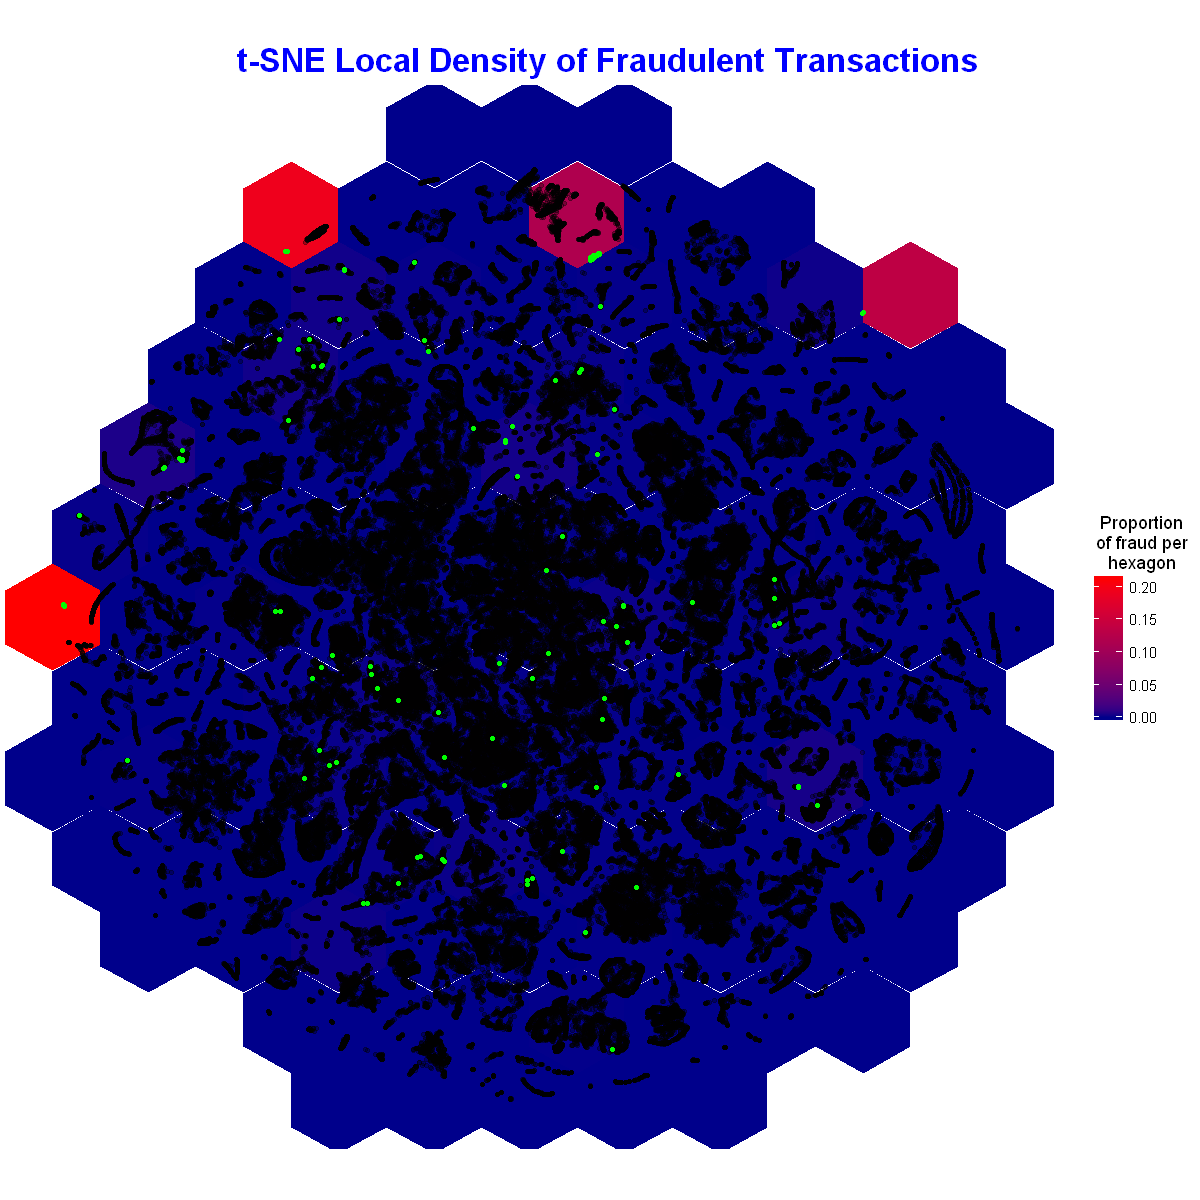

In [75]:
ggplot() +
  labs(title = "t-SNE Local Density of Fraudulent Transactions ") +
  scale_fill_gradient(low = 'darkblue', high = 'red', name="Proportion\nof fraud per\nhexagon") +
  coord_fixed(ratio = 1) +
  theme_void() +
  stat_summary_hex(data = tsne_co, aes(x=X, y=Y, z = Class), bins=10, fun = mean, alpha = 1) +
  geom_point(data = filter(tsne_co, Class == 0), aes(x = X, y = Y), alpha = 0.3, size = 1, col = 'black') +
  geom_point(data = filter(tsne_co, Class == 1), aes(x = X, y = Y), alpha = 1, size = 1, col = 'green') +
  theme(plot.title = element_text(hjust = 0.75, face="bold", size=20, color = 'blue'),
        legend.title.align=0.5)

## Benign/Malignant Tumor Classification

The second dataset we will be utilizing contains information on tumors found in persons with breast cancer. The features describe the shape, texture, size, and other attributes of the tumor, then classifies them as malignant or benign. We will use t-SNE and the hexagonal heat map as we did above to see if there is any clear distinction between these two sets of tumors


In [48]:
#Cancer Data

cancer <- read.csv('data.csv', header=T)

summary(cancer)

       id            diagnosis  radius_mean      texture_mean  
 Min.   :     8670   B:357     Min.   : 6.981   Min.   : 9.71  
 1st Qu.:   869218   M:212     1st Qu.:11.700   1st Qu.:16.17  
 Median :   906024             Median :13.370   Median :18.84  
 Mean   : 30371831             Mean   :14.127   Mean   :19.29  
 3rd Qu.:  8813129             3rd Qu.:15.780   3rd Qu.:21.80  
 Max.   :911320502             Max.   :28.110   Max.   :39.28  
 perimeter_mean     area_mean      smoothness_mean   compactness_mean 
 Min.   : 43.79   Min.   : 143.5   Min.   :0.05263   Min.   :0.01938  
 1st Qu.: 75.17   1st Qu.: 420.3   1st Qu.:0.08637   1st Qu.:0.06492  
 Median : 86.24   Median : 551.1   Median :0.09587   Median :0.09263  
 Mean   : 91.97   Mean   : 654.9   Mean   :0.09636   Mean   :0.10434  
 3rd Qu.:104.10   3rd Qu.: 782.7   3rd Qu.:0.10530   3rd Qu.:0.13040  
 Max.   :188.50   Max.   :2501.0   Max.   :0.16340   Max.   :0.34540  
 concavity_mean    concave.points_mean symmetry_mean   

In [49]:
cancer <- cancer %>% select(-X)

features <- cancer[,3:ncol(cancer)]

sapply(features, FUN = function(x) {sum(is.na(x))})

features_norm <- apply(features, MARGIN = 2, FUN = function(x){scale(x, center = T, scale = T)})

summary(features_norm)

radius_mean            texture_mean          perimeter_mean 
                      0                       0                       0 
              area_mean         smoothness_mean        compactness_mean 
                      0                       0                       0 
         concavity_mean     concave.points_mean           symmetry_mean 
                      0                       0                       0 
 fractal_dimension_mean               radius_se              texture_se 
                      0                       0                       0 
           perimeter_se                 area_se           smoothness_se 
                      0                       0                       0 
         compactness_se            concavity_se       concave.points_se 
                      0                       0                       0 
            symmetry_se    fractal_dimension_se            radius_worst 
                      0                       0                       0 
          texture_worst         perimeter_worst              area_worst 
                      0                       0                       0 
       smoothness_worst       compactness_worst         concavity_worst 
                      0                       0                       0 
   concave.points_worst          symmetry_worst fractal_dimension_worst 
                      0                       0                       0

  radius_mean       texture_mean     perimeter_mean      area_mean      
 Min.   :-2.0279   Min.   :-2.2273   Min.   :-1.9828   Min.   :-1.4532  
 1st Qu.:-0.6888   1st Qu.:-0.7253   1st Qu.:-0.6913   1st Qu.:-0.6666  
 Median :-0.2149   Median :-0.1045   Median :-0.2358   Median :-0.2949  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.4690   3rd Qu.: 0.5837   3rd Qu.: 0.4992   3rd Qu.: 0.3632  
 Max.   : 3.9678   Max.   : 4.6478   Max.   : 3.9726   Max.   : 5.2459  
 smoothness_mean    compactness_mean  concavity_mean    concave.points_mean
 Min.   :-3.10935   Min.   :-1.6087   Min.   :-1.1139   Min.   :-1.2607    
 1st Qu.:-0.71034   1st Qu.:-0.7464   1st Qu.:-0.7431   1st Qu.:-0.7373    
 Median :-0.03486   Median :-0.2217   Median :-0.3419   Median :-0.3974    
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000    
 3rd Qu.: 0.63564   3rd Qu.: 0.4934   3rd Qu.: 0.5256   3rd Qu.: 0.6464    
 Max.   : 4.76672   Max.   : 4.56

In [50]:
rtsne_out <- Rtsne(as.matrix(features_norm), pca = FALSE, verbose = TRUE,
                   theta = 0.3, max_iter = 1000, Y_init = NULL, check_duplicates = FALSE)

cancer_tsne <- cbind.data.frame('X' = rtsne_out$Y[,1], 'Y' = rtsne_out$Y[,2], 'diagnosis' = ifelse(cancer$diagnosis == 'B', 0,1))
summary(cancer_tsne)

Read the 569 x 30 data matrix successfully!
Using no_dims = 2, perplexity = 30.000000, and theta = 0.300000
Computing input similarities...
Normalizing input...
Building tree...
 - point 0 of 569
Done in 0.08 seconds (sparsity = 0.224116)!
Learning embedding...
Iteration 50: error is 61.909307 (50 iterations in 0.26 seconds)
Iteration 100: error is 59.935398 (50 iterations in 0.15 seconds)
Iteration 150: error is 59.937139 (50 iterations in 0.14 seconds)
Iteration 200: error is 59.938504 (50 iterations in 0.14 seconds)
Iteration 250: error is 59.934205 (50 iterations in 0.13 seconds)
Iteration 300: error is 1.067161 (50 iterations in 0.14 seconds)
Iteration 350: error is 0.990156 (50 iterations in 0.16 seconds)
Iteration 400: error is 0.969131 (50 iterations in 0.14 seconds)
Iteration 450: error is 0.962612 (50 iterations in 0.16 seconds)
Iteration 500: error is 0.960314 (50 iterations in 0.14 seconds)
Iteration 550: error is 0.958301 (50 iterations in 0.14 seconds)
Iteration 600: erro

       X                 Y              diagnosis     
 Min.   :-26.537   Min.   :-20.6577   Min.   :0.0000  
 1st Qu.:-13.580   1st Qu.: -7.5742   1st Qu.:0.0000  
 Median : -2.427   Median : -0.4536   Median :0.0000  
 Mean   :  0.000   Mean   :  0.0000   Mean   :0.3726  
 3rd Qu.: 14.367   3rd Qu.:  7.5648   3rd Qu.:1.0000  
 Max.   : 30.937   Max.   : 23.6034   Max.   :1.0000  

Unlike the credit card t-SNE result, we see a very clear boundary between the two classes of tumors. Although there are a few regions with a high malignant proportion within the cluster of benign tumors, they seem to be on the outskirts of the cluster. If we were using this as an exploratory data analysis method before running a classification algorithm, it would give us good hope of finding a very clear boundary line separating the two classes.

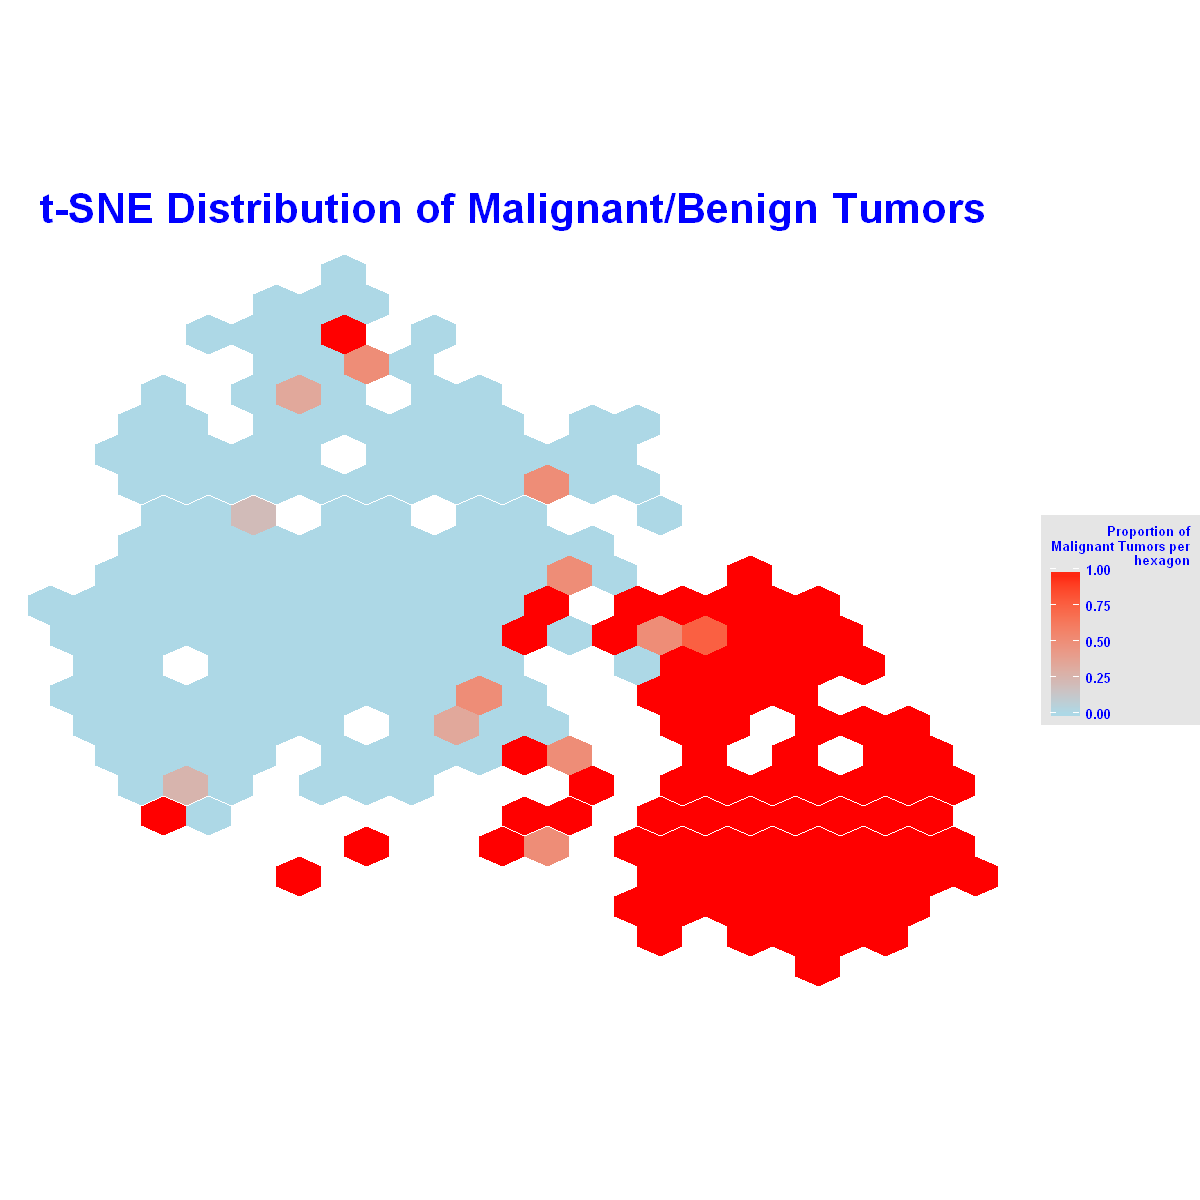

In [74]:
options(repr.plot.width=10, repr.plot.height=10)

ggplot() +
  labs(title = "t-SNE Distribution of Malignant/Benign Tumors") +
  scale_fill_gradient(low = 'lightblue', high = 'red', name="Proportion of\n Malignant Tumors per\nhexagon") +
  coord_fixed(ratio = 1) +
  theme_void() +
  stat_summary_hex(data = cancer_tsne, aes(x=X, y=Y, z = diagnosis), bins=20, fun = mean, alpha = 1) +
  geom_point(data = filter(cancer_tsne, diagnosis == 'B'), aes(x = X, y = Y), alpha = 0.3, size = 1, col = 'black') +
  geom_point(data = filter(cancer_tsne, diagnosis == 'M'), aes(x = X, y = Y), alpha = 0.9, size = 1, col = 'green') +
  theme(plot.title = element_text(hjust = .5, vjust = 2, face="bold", size=25, , color = 'blue'),
        legend.title.align=1, legend.title = element_text(colour="blue", size=8, face="bold"),
        legend.background = element_rect(fill="gray90", size=5, linetype="dotted"),
        legend.text = element_text(colour="blue", size = 8, face = "bold"))

## World Happiness Report

This dataset provides metrics which are used to measure a countries happiness. The dataset was obtained from Kaggle and a partial description is as such:

"The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations"

We will be using t-SNE to see how well it is able to group countries in similar conditions as described by the report.


In [1]:
#Happiness

happy <- read.csv('2017.csv')

summary(happy)

        Country    Happiness.Rank  Happiness.Score  Whisker.high  
 Afghanistan:  1   Min.   :  1.0   Min.   :2.693   Min.   :2.865  
 Albania    :  1   1st Qu.: 39.5   1st Qu.:4.505   1st Qu.:4.608  
 Algeria    :  1   Median : 78.0   Median :5.279   Median :5.370  
 Angola     :  1   Mean   : 78.0   Mean   :5.354   Mean   :5.452  
 Argentina  :  1   3rd Qu.:116.5   3rd Qu.:6.101   3rd Qu.:6.195  
 Armenia    :  1   Max.   :155.0   Max.   :7.537   Max.   :7.622  
 (Other)    :149                                                  
  Whisker.low    Economy..GDP.per.Capita.     Family     
 Min.   :2.521   Min.   :0.0000           Min.   :0.000  
 1st Qu.:4.375   1st Qu.:0.6634           1st Qu.:1.043  
 Median :5.193   Median :1.0646           Median :1.254  
 Mean   :5.256   Mean   :0.9847           Mean   :1.189  
 3rd Qu.:6.007   3rd Qu.:1.3180           3rd Qu.:1.414  
 Max.   :7.480   Max.   :1.8708           Max.   :1.611  
                                                         


In [2]:
features <- happy[,6:ncol(happy)]

sapply(features, FUN = function(x) {sum(is.na(x))})

features_norm <- apply(features, MARGIN = 2, FUN = function(x){scale(x, center = T, scale = T)})

summary(features_norm)

Economy..GDP.per.Capita.                        Family 
                            0                             0 
     Health..Life.Expectancy.                       Freedom 
                            0                             0 
                   Generosity Trust..Government.Corruption. 
                            0                             0 
            Dystopia.Residual 
                            0

 Economy..GDP.per.Capita.     Family        Health..Life.Expectancy.
 Min.   :-2.3402          Min.   :-4.1387   Min.   :-2.3256         
 1st Qu.:-0.7637          1st Qu.:-0.5092   1st Qu.:-0.7655         
 Median : 0.1898          Median : 0.2263   Median : 0.2307         
 Mean   : 0.0000          Mean   : 0.0000   Mean   : 0.0000         
 3rd Qu.: 0.7921          3rd Qu.: 0.7847   3rd Qu.: 0.7241         
 Max.   : 2.1057          Max.   : 1.4679   Max.   : 1.6794         
    Freedom          Generosity      Trust..Government.Corruption.
 Min.   :-2.7253   Min.   :-1.8317   Min.   :-1.2111              
 1st Qu.:-0.7007   1st Qu.:-0.6884   1st Qu.:-0.6477              
 Median : 0.1911   Median :-0.1139   Median :-0.3273              
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000              
 3rd Qu.: 0.7185   3rd Qu.: 0.5704   3rd Qu.: 0.2968              
 Max.   : 1.6631   Max.   : 4.3863   Max.   : 3.3561              
 Dystopia.Residual 
 Min.   :-2.94448  
 1st Qu.

In [5]:
rtsne_out <- Rtsne(as.matrix(features_norm), pca = FALSE, verbose = TRUE,
                   theta = 0.3, max_iter = 1000, Y_init = NULL, check_duplicates = FALSE)

happy_tsne <- cbind.data.frame('X' = rtsne_out$Y[,1], 'Y' = rtsne_out$Y[,2], 'happiness' = happy$Happiness.Score,
                               'country' = happy$Country)

Read the 155 x 7 data matrix successfully!
Using no_dims = 2, perplexity = 30.000000, and theta = 0.300000
Computing input similarities...
Normalizing input...
Building tree...
 - point 0 of 155
Done in 0.00 seconds (sparsity = 0.721748)!
Learning embedding...
Iteration 50: error is 53.207582 (50 iterations in 0.03 seconds)
Iteration 100: error is 52.297357 (50 iterations in 0.04 seconds)
Iteration 150: error is 52.254956 (50 iterations in 0.04 seconds)
Iteration 200: error is 54.273414 (50 iterations in 0.03 seconds)
Iteration 250: error is 55.914969 (50 iterations in 0.03 seconds)
Iteration 300: error is 1.465431 (50 iterations in 0.03 seconds)
Iteration 350: error is 0.730407 (50 iterations in 0.02 seconds)
Iteration 400: error is 0.543260 (50 iterations in 0.04 seconds)
Iteration 450: error is 0.501029 (50 iterations in 0.01 seconds)
Iteration 500: error is 0.487726 (50 iterations in 0.03 seconds)
Iteration 550: error is 0.460488 (50 iterations in 0.02 seconds)
Iteration 600: error

The t-SNE output has done a fantastic job of grouping similar countries together. We see very clear clusters of developed countries, developing countries, and 3rd world countries. It also managed to group the countries which dominate the top happiness levels year after year together. Although this would seem intuitive to us given our experiences in the world and news about these regions in the world, the t-SNE algorithm has managed to ascertain these relationships just with the features given.

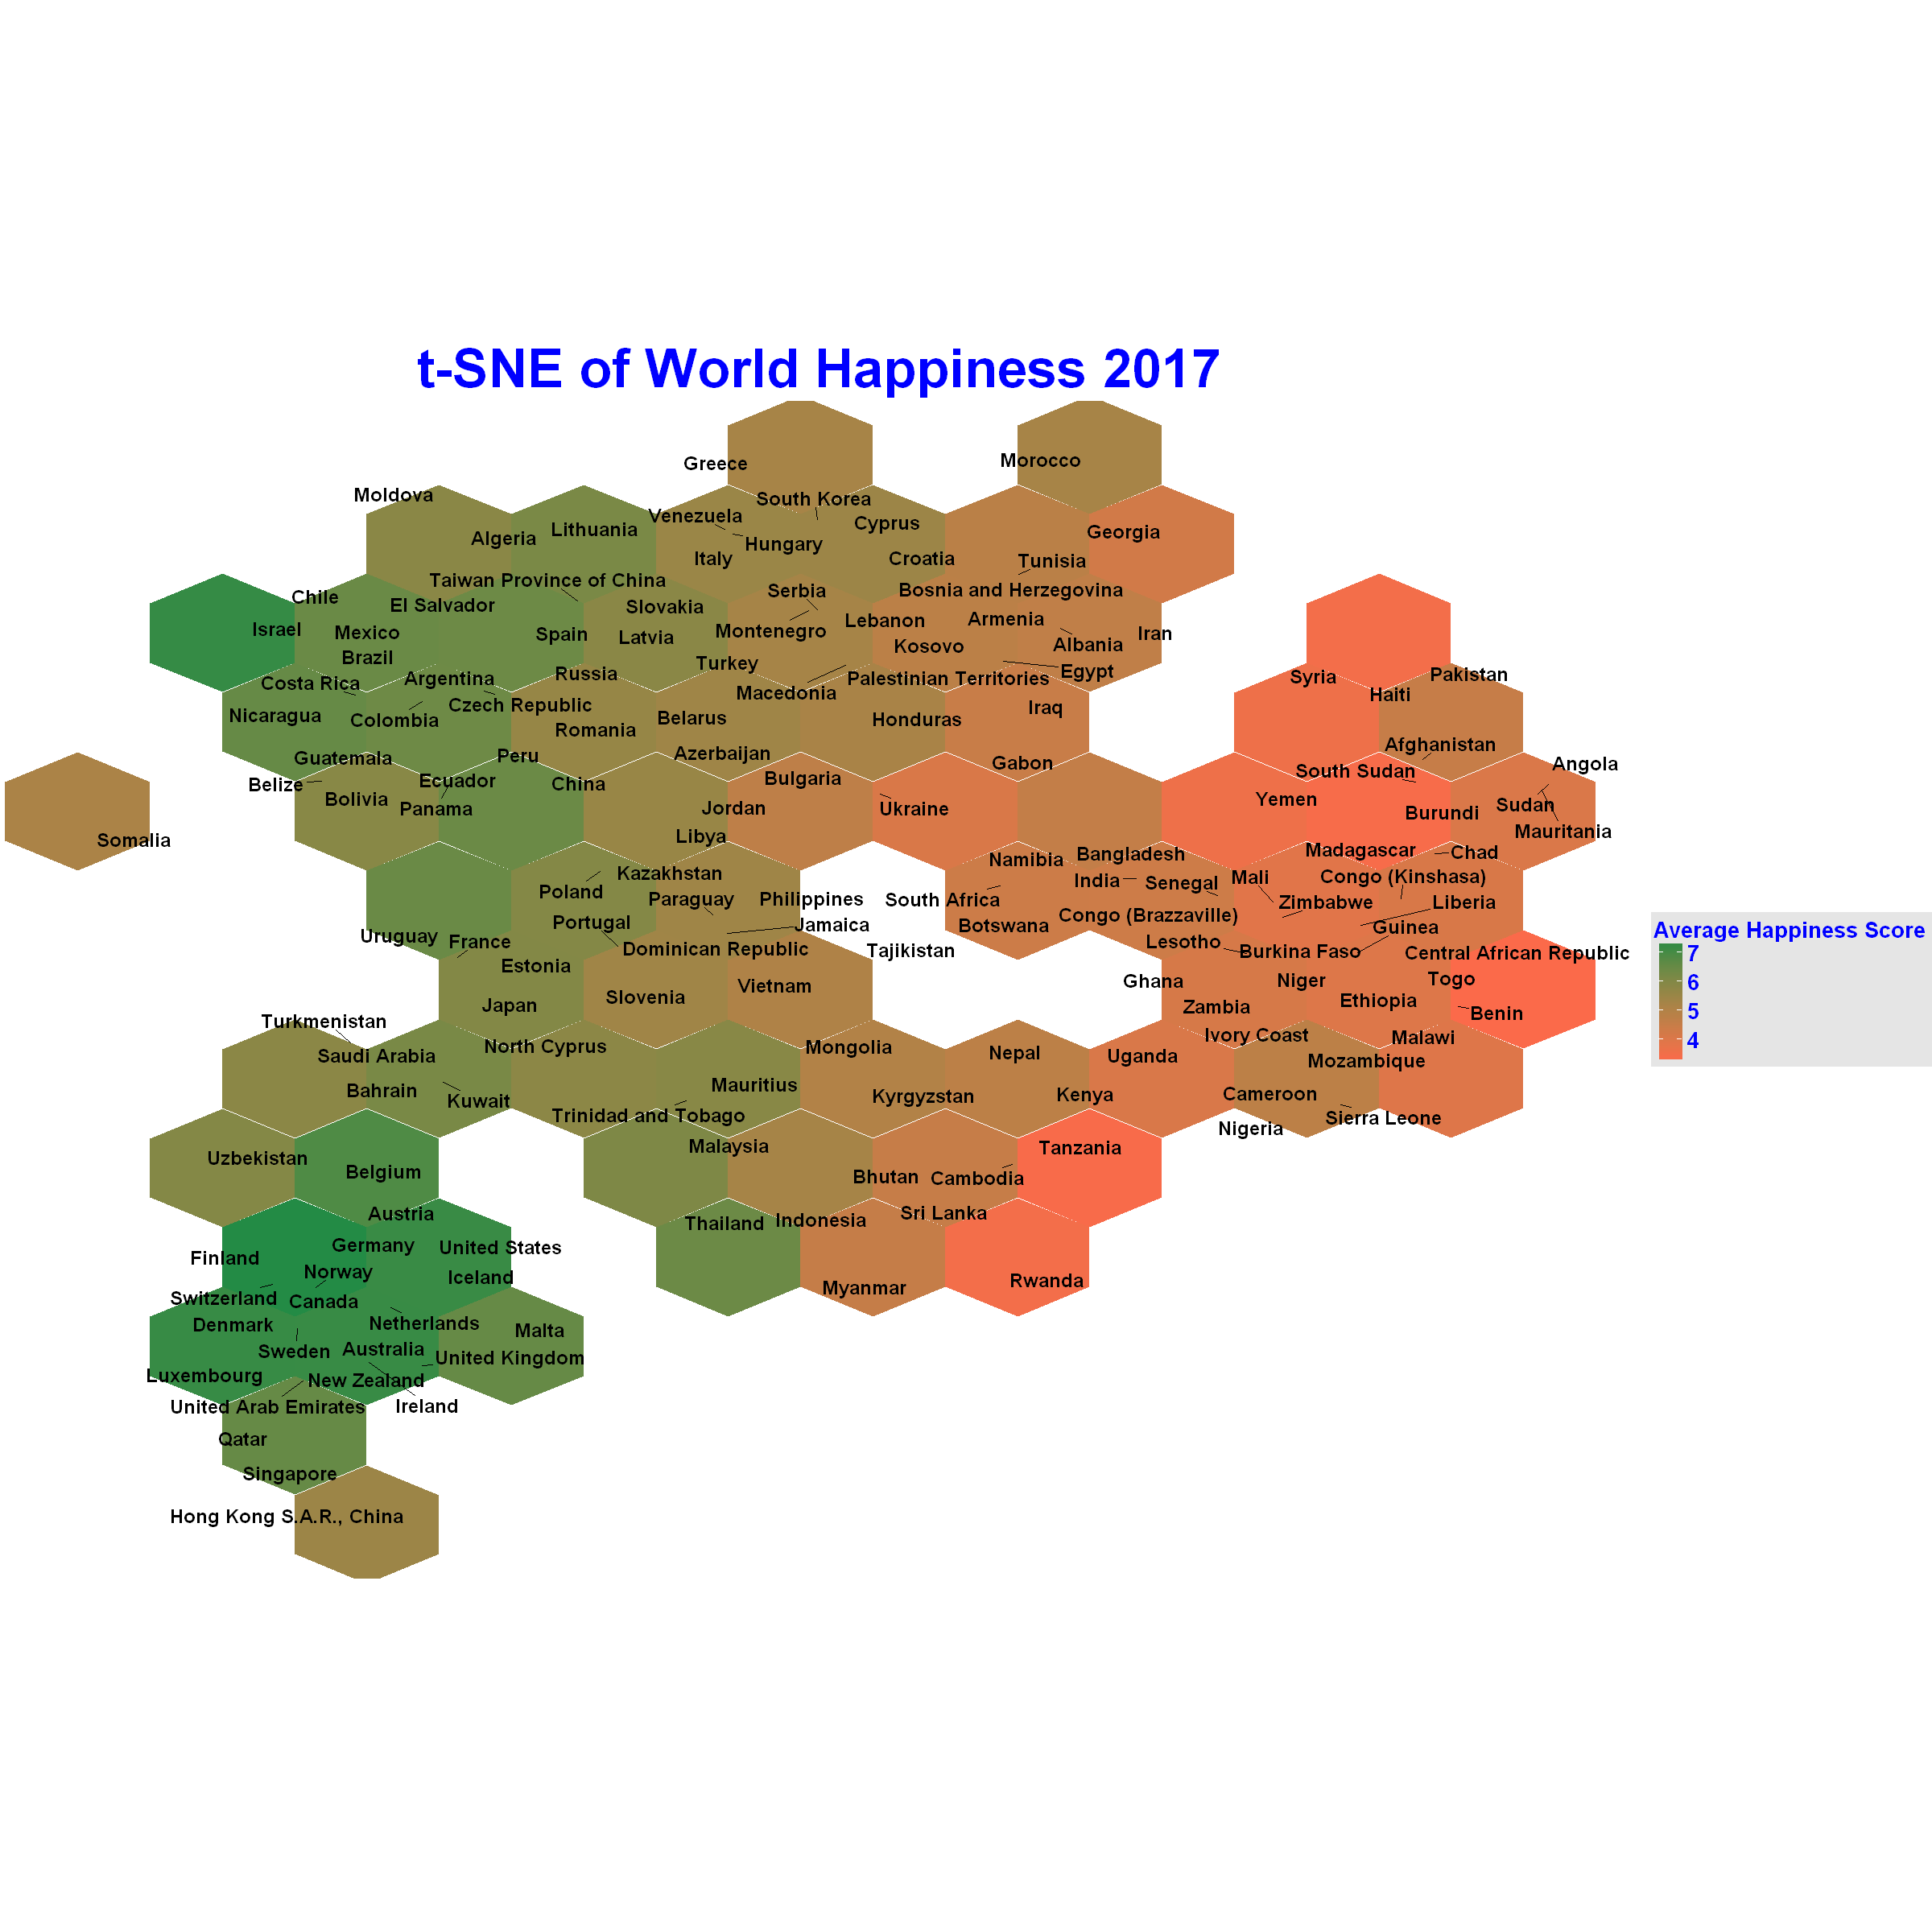

In [47]:
options(repr.plot.width=20, repr.plot.height=20)

ggplot() +
  labs(title = "t-SNE of World Happiness 2017") +
  scale_fill_gradient(low = brewer.pal(8, 'Reds')[5], high = brewer.pal(9, 'Greens')[7], name="Average Happiness Score") +
  coord_fixed(ratio = 1) +
  theme_void() +
  stat_summary_hex(data = happy_tsne, aes(x=X, y=Y, z = happiness), bins=10, fun = mean, alpha = 1) +
  geom_text_repel(data = happy_tsne, aes(x = X, y = Y, label = country), size = 5, col = 'black',  fontface = 'bold') +
  theme(plot.title = element_text(hjust = .5, vjust = 2, face="bold", size=40, , color = 'blue'),
        legend.title.align=0.75, legend.title = element_text(colour="blue", size=16, face="bold"),
        legend.background = element_rect(fill="gray90", size=750, linetype="dotted"),
        legend.text = element_text(colour="blue", size = 16, face = "bold"))